## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata
# Display the data table for preview
#study_results
#merge = mouse_metadata.merge(study_results,)
merge = pd.merge(mouse_metadata,study_results,on="Mouse ID")
merge
#merge.to_csv("mergemousedata.csv", index=True, header=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merge["Mouse ID"].describe()[1]

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#merge["Mouse ID"].value_counts().to_csv("mousecounts.csv", index=True, header=True)
mouseids = merge["Mouse ID"].sort_values()
mouseids.unique()

array(['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444',
       'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788',
       'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559',
       'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326',
       'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819',
       'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278',
       'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107',
       'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867',
       'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386',
       'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235',
       'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210',
       'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862',
       'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661',
      

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# for mouse in merge["Mouse ID"].unique():
#     print(merge.loc[merge["Mouse ID"] == mouse,:]["Mouse ID"],merge.loc[merge["Mouse ID"] == mouse,:]["Timepoint"])
merge.loc[merge["Mouse ID"] == "g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#merge = merge.drop([908,910,912,914,916])

In [6]:
# Checking the number of mice in the clean DataFrame.
lasttimepoint = pd.DataFrame()#merge.iloc[[-1],:]#columns=["Mouse ID","Drug Regimen","Sex","Age_Months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"])
mouseids = merge["Mouse ID"].sort_values()
mouseids.unique()
#merge["Drug Regimen"].unique()
for mouse in mouseids.unique():
    placeholder = merge.loc[merge["Mouse ID"]==mouse,:]
    lasttimepoint = lasttimepoint.append(placeholder.iloc[[-1],:])

lasttimepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
gp = merge.groupby("Drug Regimen")
drugs = gp["Tumor Volume (mm3)"].describe()
drugs

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

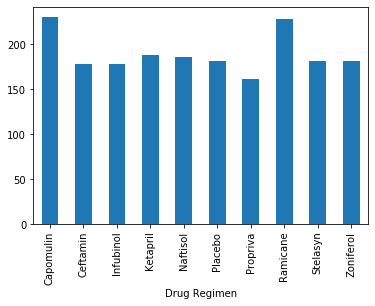

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drugs.iloc[:,0].plot.bar()

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



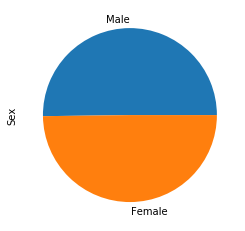

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

lasttimepoint.iloc[:,2].value_counts().plot.pie()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
fourdrugs = pd.DataFrame()
fourdrugs = fourdrugs.append(lasttimepoint.loc[lasttimepoint["Drug Regimen"]==("Capomulin"),:]) 
fourdrugs = fourdrugs.append(lasttimepoint.loc[lasttimepoint["Drug Regimen"]==("Ramicane"),:])
fourdrugs = fourdrugs.append(lasttimepoint.loc[lasttimepoint["Drug Regimen"]==("Infubinol"),:])
fourdrugs = fourdrugs.append(lasttimepoint.loc[lasttimepoint["Drug Regimen"]==("Ceftamin"),:])
fourdrugs
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin = lasttimepoint.loc[lasttimepoint["Drug Regimen"]==("Capomulin")]
capomulin.describe()
#plt.boxplot(capomulin["Tumor Volume (mm3)"],showmeans=True)
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
IQR_capomulin = capomulin.describe()["Tumor Volume (mm3)"][6]-capomulin.describe()["Tumor Volume (mm3)"][4]
lowerbound = capomulin.describe()["Tumor Volume (mm3)"][4]-1.5*IQR_capomulin
upperbound = capomulin.describe()["Tumor Volume (mm3)"][6]+1.5*IQR_capomulin
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
print("Upper and Lower Bounds:", upperbound,lowerbound)
outliers = capomulin.loc[capomulin["Tumor Volume (mm3)"] <= lowerbound,:]
outliers = outliers.append(capomulin.loc[capomulin["Tumor Volume (mm3)"] >= upperbound,:])
outliers
#no outliers
capomulin

Upper and Lower Bounds: 51.83201549 20.70456164999999


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1
204,i738,Capomulin,Female,23,20,45,37.311846,2
337,j119,Capomulin,Female,7,23,45,38.125164,1
317,j246,Capomulin,Female,21,21,35,38.753265,1
380,l509,Capomulin,Male,17,21,45,41.483008,3


{'whiskers': [<matplotlib.lines.Line2D at 0x2b729fda348>,
 'caps': [<matplotlib.lines.Line2D at 0x2b729fe9e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b729fe3e08>],
 'medians': [<matplotlib.lines.Line2D at 0x2b729feffc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b729ff5c88>],
 'means': [<matplotlib.lines.Line2D at 0x2b729fefb88>]}

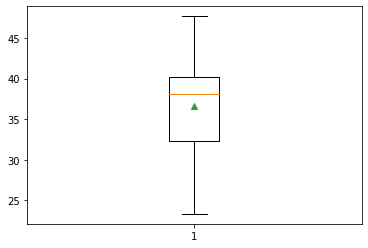

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(capomulin["Tumor Volume (mm3)"],showmeans=True)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

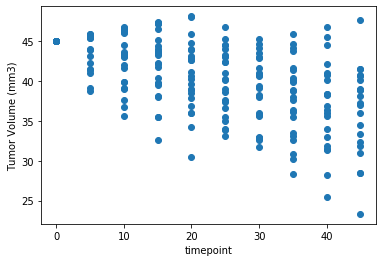

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin2 = merge.loc[merge["Drug Regimen"] == "Capomulin",:]
capomulin2
plt.scatter(capomulin2["Timepoint"], capomulin2["Tumor Volume (mm3)"])
plt.xlabel("timepoint")
plt.ylabel("Tumor Volume (mm3)")

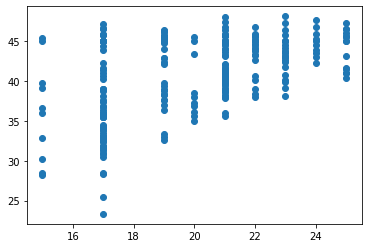

In [50]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin2["Weight (g)"],capomulin2["Tumor Volume (mm3)"])

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
